# About
Roughwork related to the necessity of a numeraire reference point in finance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Helper Function

In [2]:
def get_yahoo_prices(data_source):
    """Load time series of prices from finance.yahoo.com
    
    Parameters
    ----------
    data_source : str
        URL or path to csv file.
    
    Returns
    -------
    price_sr : Pandas Series
    """

    # Load Dataset
    price_data = pd.read_csv(data_source, index_col=0, parse_dates=True)
    
    # Select Closing Prices
    price_sr = price_data.Close
    
    # Rename the series
    price_sr.rename('price', inplace=True)

    return price_sr

In [3]:
btc_url = 'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1483228800&period2=1640995199&interval=1d&events=history&includeAdjustedClose=true'
btc_url = 'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1483228800&period2=1650153599&interval=1d&events=history&includeAdjustedClose=true'

In [4]:
btc_price_sr = get_yahoo_prices(btc_url)

# BTC Price

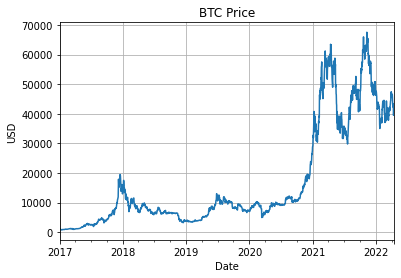

In [5]:
btc_price_sr.plot(title='BTC Price', ylabel='USD', grid=True);

# 20 mBTC price evolution

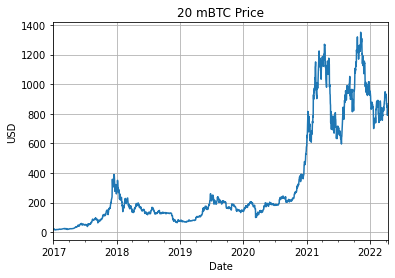

In [6]:
# 20 mBTC
my_sr = 0.020*btc_price_sr
my_sr.plot(title='20 mBTC Price', ylabel='USD', grid=True);

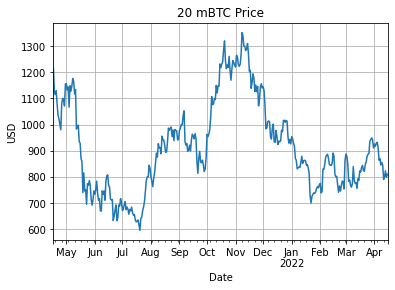

In [7]:
# 20 mBTC
my_sr = 0.020*btc_price_sr
my_sr.tail(365).plot(title='20 mBTC Price', ylabel='USD', grid=True);

# $100,000 price evolution

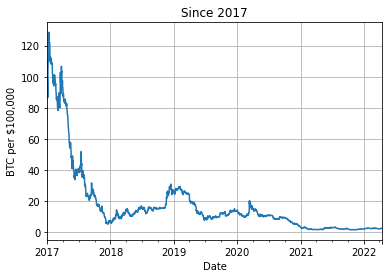

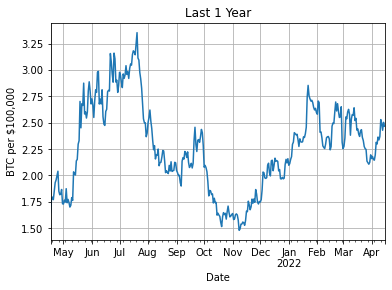

In [8]:
# Number of BTC you can get with 100_000 USD
# * e.g. supposing you work in bitcoin and want to buy 100_000 USD at some point in time
one_lakh_as_btc = 100_000/btc_price_sr
one_lakh_as_btc.plot(title='Since 2017', ylabel='BTC per $100,000', grid=True);
plt.show()

one_lakh_as_btc.tail(365).plot(title='Last 1 Year', ylabel='BTC per $100,000',
                               grid=True);

Comment:
* Within 2022 so far you need anything from 1.5 to 3 BTC to buy \\$100,000 depending on your timing
   * Imagine if you were buying a (cheap) property and its value varied like this by 100%
   * Say from \\$1MM to \\$500M within year.
   * You'd be in a very unstable market, akin to Dublin around the 2008 crash.
* Centering at 2.25 much of the year is >10% away from the average

Roughwork
* snap 100k$ at different points in time
* show the evolution of that amount
* do the equivalent in GBP
* idea: compare to property price time series numeraire
* Next:
    * ~Pick the first of each month and propogate that

In [9]:
sr = btc_price_sr.copy()
sr = sr.loc[sr.index.year>=2021]
sr.groupby([sr.index.strftime('%y-%m')]).first()

Date
21-01    29374.152344
21-02    33537.175781
21-03    49631.242188
21-04    59095.808594
21-05    57828.050781
21-06    36684.925781
21-07    33572.117188
21-08    39974.894531
21-09    48847.027344
21-10    48116.941406
21-11    61004.406250
21-12    57229.828125
22-01    47686.812500
22-02    38743.273438
22-03    44354.636719
22-04    46281.644531
Name: price, dtype: float64